In [ ]:
import json
from tensorflow import keras
from tensorflow.keras import layers

## Sequential API

In [ ]:
model1_sequential = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


## Functional API

In [ ]:
input = layers.Input(shape=(3,))
layer1 = layers.Dense(3, activation='relu')(input)
output = layers.Dense(1, activation='sigmoid')(layer1)

model1_functional = keras.Model(inputs=input, outputs=output)

model1_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input1 = layers.Input(shape=(3,), name='input1')
input2 = layers.Input(shape=(5,), name='input2')

concat1 = layers.Concatenate()([input1, input2])

layer1 = layers.Dense(3, activation='relu')(concat1)
layer2 = layers.Dense(3, activation='relu')(layer1)

concat2 = layers.Concatenate()([layer1, layer2])
layer3 = layers.Dense(3, activation='relu')(concat2)

output1 = layers.Dense(1, activation='sigmoid')(layer3)
output2 = layers.Dense(1, activation='sigmoid')(layer3)

model2_functional = keras.Model(inputs=[input1, input2],
                                outputs=[output1, output2],
                                name='MyModel')

model2_functional.summary()

Model: "MyModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 input2 (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 8)            0           ['input1[0][0]',                 
                                                                  'input2[0][0]']                 
                                                                                                  
 dense (Dense)                  (None, 3)            27          ['concatenate[0][0]']      

## Save model's architecture

In [ ]:
model_config = model1_functional.get_config()

with open('model_config.json', 'w') as f:
  json.dump(model_config, f, indent=4)

## Save model's weights

In [ ]:
model1_functional.save_weights('model_weights')
model1_functional.save_weights('model_weights.h5')
model1_functional.save_weights('model_weights.keras')

## Save model's architecture and weights

In [ ]:
model1_functional.save('model')
model1_functional.save('model.h5')
model1_functional.save('model.keras')

## Load model's architecture

In [ ]:
with open('model_config.json', 'r') as f:
  model_config = json.load(f)

model1_functional_a = keras.Model.from_config(model_config)
model1_functional_a.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


## Load model's weights

In [ ]:
model1_functional_a.load_weights('model_weights.h5')

## Load full model

In [ ]:
model1_functional_b = keras.saving.load_model('model.h5')
model1_functional_b.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


## Plot model

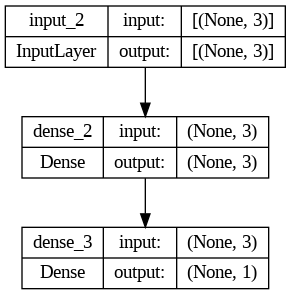

In [ ]:
keras.utils.plot_model(model1_functional_a, to_file='MyModel.png',
                       show_shapes=True)

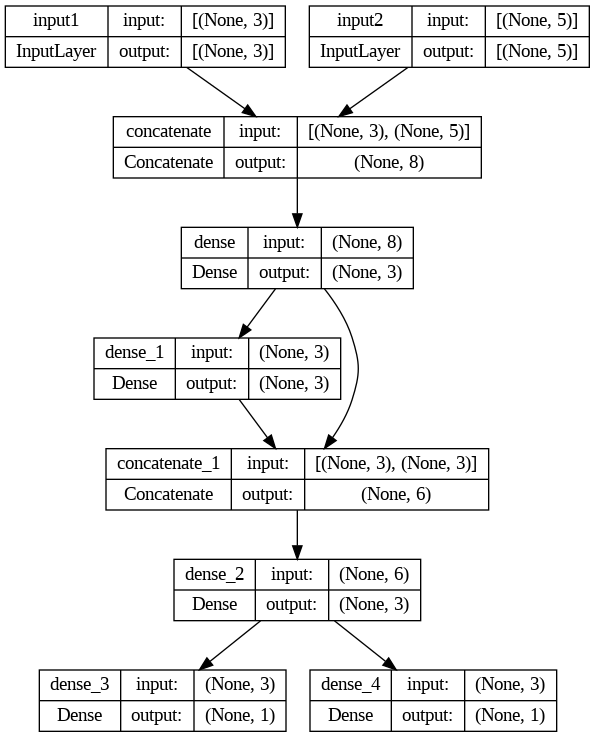

In [ ]:
keras.utils.plot_model(model2_functional, 'model2.png', show_shapes=True)